## Ismail Akram

# An Analysis of Film and Video Game Revenue with their Aggregate Ratings

For my project, I will explore the relationship between top grossing video games and films with their aggregate ratings. 

I want to answer several questions that arise from such a comparison. Is there a notable disparity between critical and audience reception? If the difference is minute, can I streamline them? Is there a correlation between aggregate ratings and their respective revenue?

How did films and video games perform over the last few decades? How do video game and film grosses compare? Which of the two have a stronger correlation with their aggregate scores? 

Which one gravitates closer to the data (gross revenue)?

I will be using data extracted (and cleaned up as CSV files) from:

https://vgsales.fandom.com/wiki/List_of_highest-grossing_video_games for Video Game Revenue

https://en.wikipedia.org/wiki/List_of_highest-grossing_films for Film Revenue

https://www.igdb.com/discover for Video Game Aggregate Ratings

https://www.metacritic.com/ for Film Aggregate Ratings

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

# Importing datasets
The following CSV files are cleaned up HTML files. I've also manually entered the aggregate ratings from their respective websites (IGDB and Metacritic).

I've filled in missing data entries for ratings with the overall average of all other ratings to streamline the data. Both for critic and user ratings. This was necessary for later steps as certain plots came out completely void. 

This will allow me to create the datatype "Average" between User and Critic reviews later in the investigation.

In [2]:
#Dataset of both the VGSales and IDBG ratings combined as a CSV
VGDF = pd.read_csv('VGDF.csv', header = 0)
VGDF

,Title,Year,Gross Revenue (US$),Aggregate Rating (User),Aggregate Rating (Critic),Genre
0,Pac-Man,1980,16330000000,83,79,Maze
1,Space Invaders,1978,14457000000,78,77,Shmup
2,Street Fighter II,1991,11854000000,83,80,Fighting
3,Dungeon Fighter Online,2005,11800000000,60,80,MMO beat 'em up
4,CrossFire,2007,10850000000,70,80,MMOFPS
5,World of Warcraft,2004,9702000000,86,86,MMORPG
6,Lineage,1998,9635000000,45,59,MMORPG
7,League of Legends,2009,8416000000,76,84,MOBA
8,Westward Journey,2001,8012000000,78,80,MMORPG
9,Monster Strike,2013,7200000000,78,80,Puzzle strategy RPG


In [3]:
#Dataset of both the Wikipedia table and Metacritic ratings combined as a CSV
FilmDF = pd.read_csv('FilmDF.csv', header = 0)
FilmDF

,Title,Year,Gross Revenue (US$),Aggregate Rating (User),Aggregate Rating (Critic)
0,Avengers: Endgame,2019,2797800564,94,90
1,Avatar,2009,2789679794,82,82
2,Titanic,1997,2187463944,76,71
3,Star Wars: The Force Awakens,2015,2068223624,93,86
4,Avengers: Infinity War,2018,2048359754,85,91
5,Jurassic World,2015,1671713208,72,78
6,The Lion King,2019,1655714790,53,88
7,The Avengers,2012,1518812988,91,91
8,Furious 7,2015,1516045911,81,82
9,Avengers: Age of Ultron,2015,1405403694,75,83


# Exploration of Single Variable Data

In [4]:
#Mean data of Video Game Dataframe
VGDF.mean()

Year                         2.001812e+03
Gross Revenue (US$)          4.104172e+09
Aggregate Rating (User)      7.807812e+01
Aggregate Rating (Critic)    7.987500e+01
dtype: float64

In [5]:
#Looking for prominent year (2005).
VGDF.median()

Year                         2.005500e+03
Gross Revenue (US$)          2.640000e+09
Aggregate Rating (User)      7.800000e+01
Aggregate Rating (Critic)    8.000000e+01
dtype: float64

In [6]:
#Mean data of Film Dataframe
FilmDF.mean()

Year                         2.013318e+03
Gross Revenue (US$)          1.320316e+09
Aggregate Rating (User)      7.572727e+01
Aggregate Rating (Critic)    7.770455e+01
dtype: float64

In [7]:
#Looking for prominent year (2015)
FilmDF.median()

Year                         2.015000e+03
Gross Revenue (US$)          1.140045e+09
Aggregate Rating (User)      8.150000e+01
Aggregate Rating (Critic)    8.350000e+01
dtype: float64

Since the Aggregate Rating (User) and Aggregate Rating (Critic) averages differ by ~1 (Video Games) and ~2 (Films), I'm going to streamline both User and Critic Rating as "Average Rating". This will also create a wholistic investigation.

In [8]:
#Creating Average Rating Datatype for Video Games
VGDF["Average Rating"] = ((VGDF["Aggregate Rating (User)"])+(VGDF["Aggregate Rating (Critic)"]))/2

In [9]:
#Same for Film Ratings
FilmDF["Average Rating"] = ((FilmDF["Aggregate Rating (User)"])+(FilmDF["Aggregate Rating (Critic)"]))/2

Text(0.5,1,'Film Revenue')

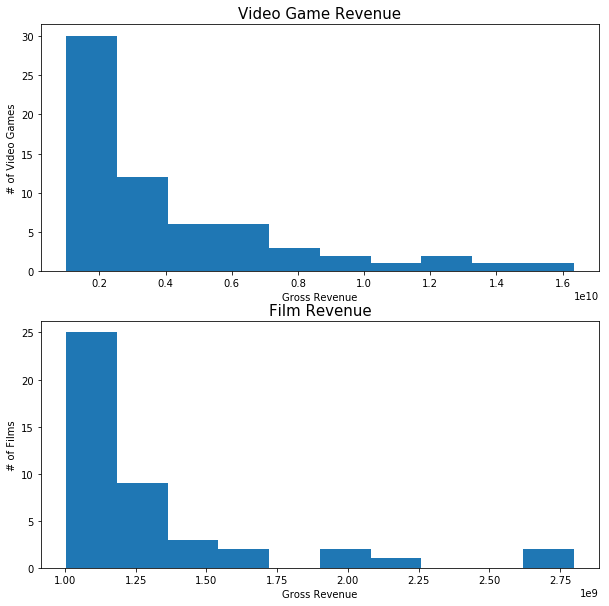

In [10]:
fig, ax =plt.subplots(2,1, figsize=(10,10))
ax[0].hist(VGDF["Gross Revenue (US$)"]);
ax[0].set_xlabel("Gross Revenue")
ax[0].set_ylabel("# of Video Games")
ax[0].set_title("Video Game Revenue", fontsize=15, y=1)
ax[1].hist(FilmDF["Gross Revenue (US$)"]);
ax[1].set_xlabel("Gross Revenue")
ax[1].set_ylabel("# of Films")
ax[1].set_title("Film Revenue", fontsize=15, y=1)

Above we can see that both distributions skew heavily to the right.

Text(0.5,0.92,'Boxplot of Prominent Video Game and Movie Gross Revenues through the Years')

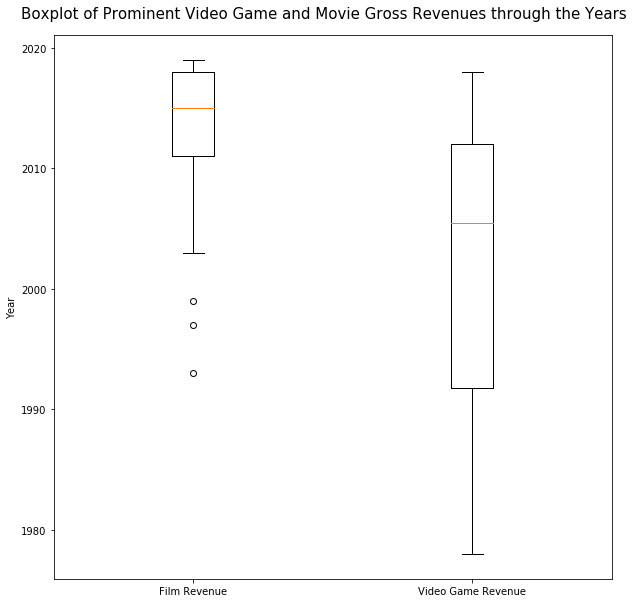

In [11]:
fig = plt.figure(figsize=(10,10))
plt.boxplot([FilmDF["Year"],
            VGDF["Year"]]
            )
plt.xticks([1,2], ["Film Revenue", "Video Game Revenue"])
plt.ylabel("Year")
fig.suptitle("Boxplot of Prominent Video Game and Movie Gross Revenues through the Years", fontsize=15, y=0.92)

Prominent revenue in Films stem from recent years as opposed to Video Games more dispersed gross. Note the longer range of Video Game revenue covering film outliers. The respective medians have been noted as 2015 and 2005. 

Text(0.5,0.92,'Boxplot of Film and Video Game Revnues')

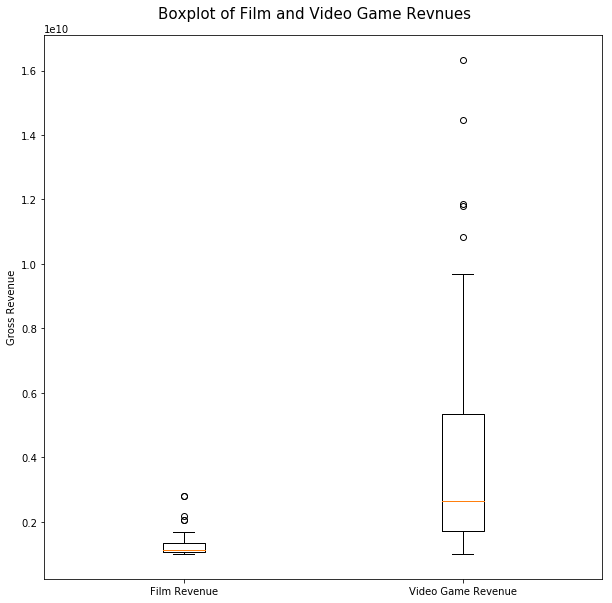

In [12]:
#Looking for revenue outliers
fig = plt.figure(figsize=(10,10))
plt.boxplot([FilmDF["Gross Revenue (US$)"],
            VGDF["Gross Revenue (US$)"]]
            )
plt.xticks([1,2], ["Film Revenue", "Video Game Revenue"])
plt.ylabel("Gross Revenue")
fig.suptitle("Boxplot of Film and Video Game Revnues", fontsize=15, y=0.92)

In [13]:
#Upper Whisker VGDF
VGDF.quantile(q=0.75) + (1.5 * (VGDF.quantile(q=0.75) - VGDF.quantile(q=0.25)))

Year                         2.042375e+03
Gross Revenue (US$)          1.081100e+10
Aggregate Rating (User)      9.687500e+01
Aggregate Rating (Critic)    9.225000e+01
Average Rating               9.750000e+01
dtype: float64

In [14]:
#Upper Whisker Film
FilmDF.quantile(q=0.75) + (1.5 * (FilmDF.quantile(q=0.75) - FilmDF.quantile(q=0.25)))

Year                         2.028500e+03
Gross Revenue (US$)          1.775421e+09
Aggregate Rating (User)      1.368750e+02
Aggregate Rating (Critic)    1.148750e+02
Average Rating               1.202500e+02
dtype: float64

In [15]:
#Maximum VGDF
VGDF[['Gross Revenue (US$)','Aggregate Rating (User)', 'Aggregate Rating (Critic)']].max()

Gross Revenue (US$)          16330000000
Aggregate Rating (User)               98
Aggregate Rating (Critic)            100
dtype: int64

In [16]:
#Maximum FilmDF
FilmDF[['Gross Revenue (US$)','Aggregate Rating (User)','Aggregate Rating (Critic)']].max()

Gross Revenue (US$)          2797800564
Aggregate Rating (User)              98
Aggregate Rating (Critic)            95
dtype: int64

In [17]:
#Variance VGDF
VGDF.var()

Year                         1.452024e+02
Gross Revenue (US$)          1.205835e+19
Aggregate Rating (User)      9.620015e+01
Aggregate Rating (Critic)    8.398413e+01
Average Rating               6.564627e+01
dtype: float64

In [18]:
#Variance FilmDF
FilmDF.var()

Year                         3.650106e+01
Gross Revenue (US$)          1.884641e+17
Aggregate Rating (User)      4.049471e+02
Aggregate Rating (Critic)    2.329107e+02
Average Rating               2.624232e+02
dtype: float64

In [19]:
#Range VGDF
VGDF[['Gross Revenue (US$)','Aggregate Rating (User)', 'Aggregate Rating (Critic)']].max() - VGDF[['Gross Revenue (US$)','Aggregate Rating (User)', 'Aggregate Rating (Critic)']].min()

Gross Revenue (US$)          15330000000
Aggregate Rating (User)               53
Aggregate Rating (Critic)             50
dtype: int64

In [20]:
#Range FilmDF
#Note the large range in user rating
FilmDF[['Gross Revenue (US$)','Aggregate Rating (User)','Aggregate Rating (Critic)']].max() - FilmDF[['Gross Revenue (US$)','Aggregate Rating (User)','Aggregate Rating (Critic)']].min()

Gross Revenue (US$)          1792866531
Aggregate Rating (User)              80
Aggregate Rating (Critic)            51
dtype: int64

In [21]:
#Interquartile Range
VGDF.quantile(q=0.75) - VGDF.quantile(q=0.25)

Year                         2.025000e+01
Gross Revenue (US$)          3.639500e+09
Aggregate Rating (User)      9.250000e+00
Aggregate Rating (Critic)    5.500000e+00
Average Rating               9.000000e+00
dtype: float64

In [22]:
#Interquartile Range
FilmDF.quantile(q=0.75) - FilmDF.quantile(q=0.25)

Year                         7.000000e+00
Gross Revenue (US$)          2.882817e+08
Aggregate Rating (User)      2.975000e+01
Aggregate Rating (Critic)    1.725000e+01
Average Rating               2.050000e+01
dtype: float64

From the revenue boxplot and data above, we can see that the top grossing video games grossed more than the top grossing films. Even the film outliers are eclipsed by Video Game range.

# Relationship Between Revenue and Ratings

Text(0.5,0.92,'Video Game Revenue & Rating')

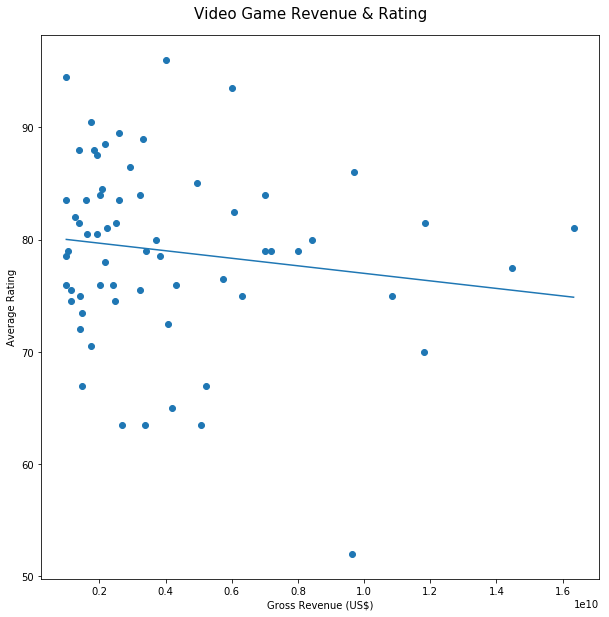

In [23]:
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

slope, intercept, predictions, residuals = evaluate_linear_relationship(VGDF["Gross Revenue (US$)"],
                                                                        VGDF["Average Rating"])
fig = plt.figure(figsize=(10,10))
plt.scatter(VGDF["Gross Revenue (US$)"],
            VGDF["Average Rating"]) #Average Rating comes into play
sorted_order = np.argsort(VGDF["Gross Revenue (US$)"])
plt.plot(VGDF["Gross Revenue (US$)"][sorted_order], predictions[sorted_order])
plt.ylabel("Average Rating")
plt.xlabel("Gross Revenue (US$)")
fig.suptitle("Video Game Revenue & Rating", fontsize=15, y=0.92)

Text(0.5,0.92,'Video Game Residuals')

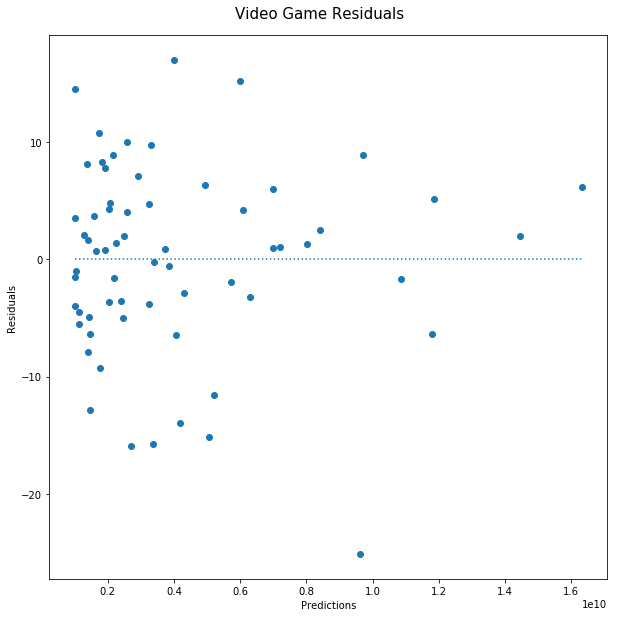

In [24]:
fig = plt.figure(figsize=(10,10))
plt.scatter(VGDF["Gross Revenue (US$)"], residuals)
plt.plot([VGDF["Gross Revenue (US$)"].min(), VGDF["Gross Revenue (US$)"].max()], [0,0], linestyle='dotted')
plt.xlabel("Predictions")
plt.ylabel('Residuals')
fig.suptitle('Video Game Residuals', fontsize=15, y=0.92)

In [25]:
#R-Squared Value
np.var(predictions) / np.var(VGDF["Average Rating"])

0.020702831492253312

Text(0.5,0.92,'Film Revenue & Average Rating')

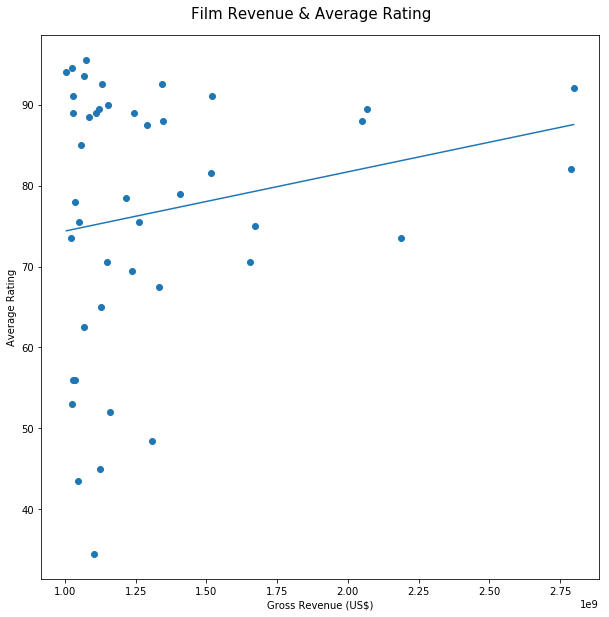

In [26]:
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

slope, intercept, predictions, residuals = evaluate_linear_relationship(FilmDF["Gross Revenue (US$)"],
                                                                        FilmDF["Average Rating"])
fig = plt.figure(figsize=(10,10))
plt.scatter(FilmDF["Gross Revenue (US$)"],
            FilmDF["Average Rating"])
sorted_order = np.argsort(FilmDF["Gross Revenue (US$)"])
plt.plot(FilmDF["Gross Revenue (US$)"][sorted_order], predictions[sorted_order])
plt.ylabel("Average Rating")
plt.xlabel("Gross Revenue (US$)")
fig.suptitle("Film Revenue & Average Rating", fontsize=15, y=0.92)

Text(0.5,0.92,'Film Residuals')

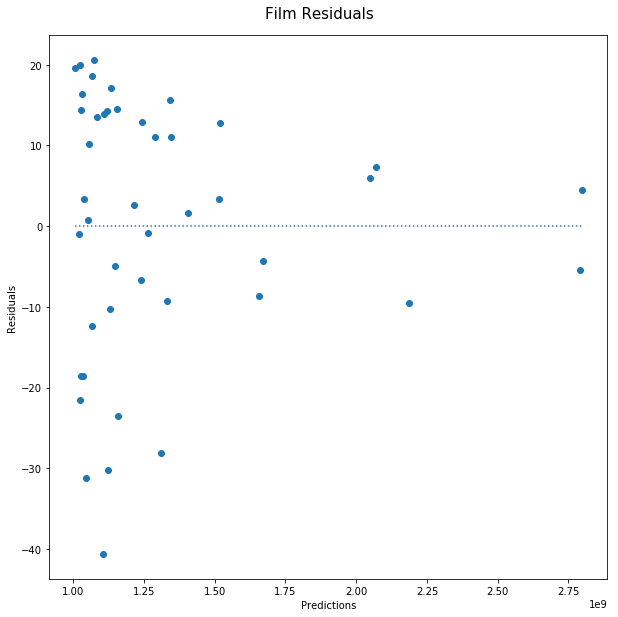

In [27]:
fig = plt.figure(figsize=(10,10))
plt.scatter(FilmDF["Gross Revenue (US$)"], residuals)
plt.plot([FilmDF["Gross Revenue (US$)"].min(), FilmDF["Gross Revenue (US$)"].max()], [0,0], linestyle='dotted')
plt.xlabel("Predictions")
plt.ylabel('Residuals')
fig.suptitle('Film Residuals', fontsize=15, y=0.92)

In [28]:
#R-Squared Value
np.var(predictions) / np.var(FilmDF["Average Rating"])

0.03842125029071273

The relationship between Average Ratings and Gross Revenue yielded an R-squared value of 0.020702831492253312 for Video Games and 0.03842125029071273 for Films.

Video games have an R-squared value of ~0.02, meaning about 2% of the gross revenue can account for the variance of ratings. Which honestly sounds surprising given how film and video game premieres are shown in a very controlling manner.

A similar statement can be said with film's ~4%.

### Transforming distributions into normal distributions.

Text(0.5,1,'Film Revenue')

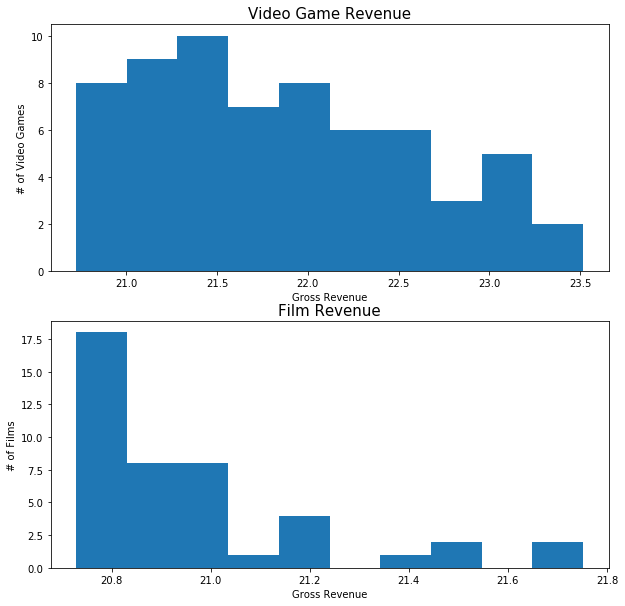

In [29]:
#Using log
#Films still remains as heavily skewed to the right
fig, ax =plt.subplots(2,1, figsize=(10,10))
ax[0].hist(np.log(VGDF["Gross Revenue (US$)"]));
ax[0].set_xlabel("Gross Revenue")
ax[0].set_ylabel("# of Video Games")
ax[0].set_title("Video Game Revenue", fontsize=15, y=1)
ax[1].hist(np.log(FilmDF["Gross Revenue (US$)"]));
ax[1].set_xlabel("Gross Revenue")
ax[1].set_ylabel("# of Films")
ax[1].set_title("Film Revenue", fontsize=15, y=1)

Text(0.5,0.92,'Gross Video Game Revenue & Average Rating')

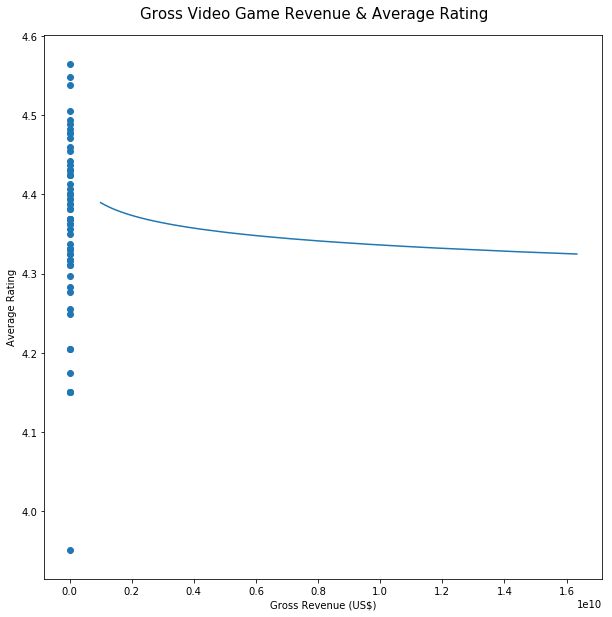

In [30]:
#Video Games
slope, intercept, predictions, residuals = evaluate_linear_relationship(np.log(VGDF["Gross Revenue (US$)"]), np.log(VGDF["Average Rating"]))

fig = plt.figure(figsize=(10,10))
plt.scatter(np.log(VGDF["Gross Revenue (US$)"]),
            np.log(VGDF["Average Rating"]))
sorted_order = np.argsort(VGDF["Gross Revenue (US$)"])
plt.plot(VGDF["Gross Revenue (US$)"][sorted_order], predictions[sorted_order])
plt.ylabel("Average Rating")
plt.xlabel("Gross Revenue (US$)")
fig.suptitle("Gross Video Game Revenue & Average Rating", fontsize=15, y=0.92)

Text(0.5,0.92,'Video Game Residuals')

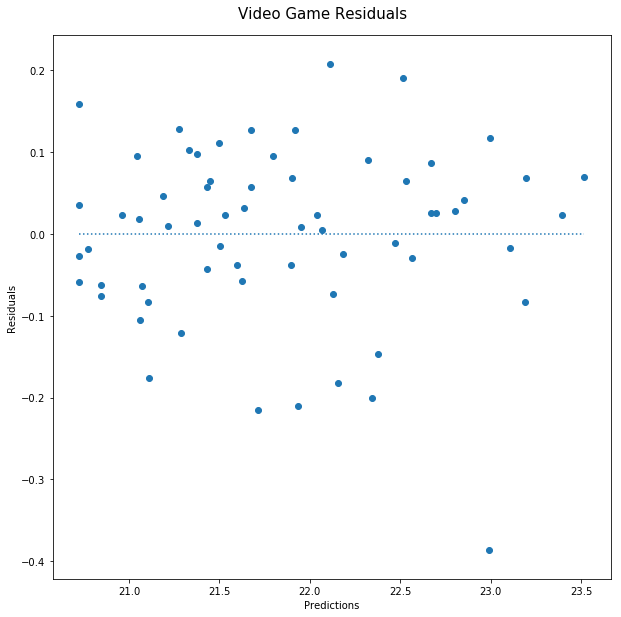

In [31]:
fig = plt.figure(figsize=(10,10))
plt.scatter(np.log(VGDF["Gross Revenue (US$)"]), residuals)
plt.plot([np.log(VGDF["Gross Revenue (US$)"]).min(), np.log(VGDF["Gross Revenue (US$)"]).max()], [0,0], linestyle='dotted')
plt.xlabel("Predictions")
plt.ylabel('Residuals')
fig.suptitle('Video Game Residuals', fontsize=15, y=0.92)

In [32]:
#Transformed R-Squared Value
np.var(predictions) / np.var(np.log(VGDF["Average Rating"]))

0.026496836550160417

Text(0.5,0.92,'Gross Video Game Revenue & Average Rating')

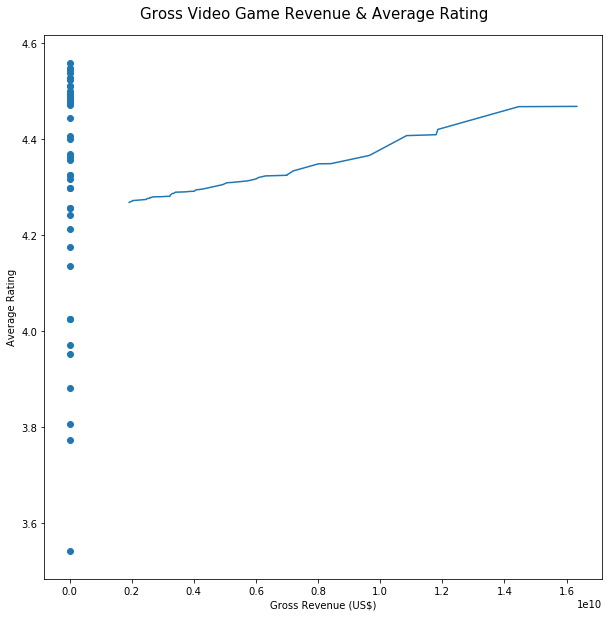

In [33]:
#Films
slope, intercept, predictions, residuals = evaluate_linear_relationship(np.log(FilmDF["Gross Revenue (US$)"]), np.log(FilmDF["Average Rating"]))

fig = plt.figure(figsize=(10,10))
plt.scatter(np.log(FilmDF["Gross Revenue (US$)"]),
            np.log(FilmDF["Average Rating"]))
sorted_order = np.argsort(FilmDF["Gross Revenue (US$)"])
plt.plot(VGDF["Gross Revenue (US$)"][sorted_order], predictions[sorted_order])
plt.ylabel("Average Rating")
plt.xlabel("Gross Revenue (US$)")
fig.suptitle("Gross Video Game Revenue & Average Rating", fontsize=15, y=0.92)

Text(0.5,0.92,'Video Game Residuals')

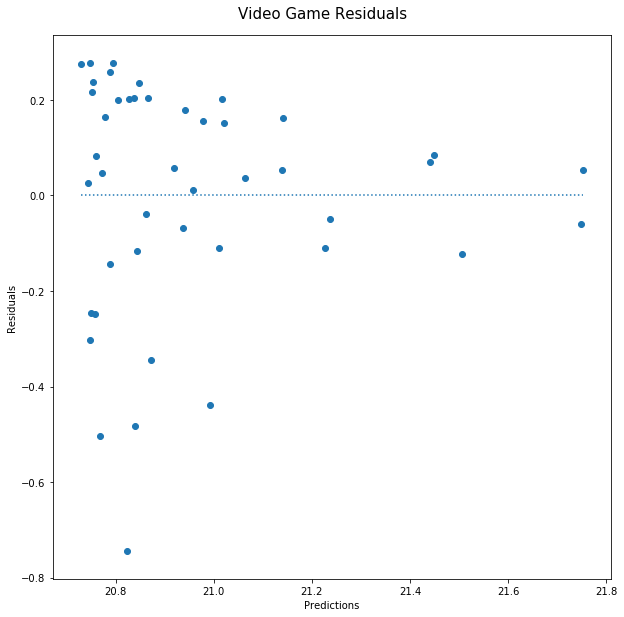

In [34]:
fig = plt.figure(figsize=(10,10))
plt.scatter(np.log(FilmDF["Gross Revenue (US$)"]), residuals)
plt.plot([np.log(FilmDF["Gross Revenue (US$)"]).min(), np.log(FilmDF["Gross Revenue (US$)"]).max()], [0,0], linestyle='dotted')
plt.xlabel("Predictions")
plt.ylabel('Residuals')
fig.suptitle('Video Game Residuals', fontsize=15, y=0.92)

In [35]:
#Transformed R-Squared Value
np.var(predictions) / np.var(np.log(FilmDF["Average Rating"]))

0.04400434894784746

Transforming both distributions still yield a similar R-square value. I'll finish of by looking at correlation.

In [36]:
stats.pearsonr(VGDF["Gross Revenue (US$)"], VGDF["Average Rating"])

(-0.1438847854787063, 0.2566663553424979)

With a P-Value of over 0.05, the correlation of -0.14388 is insignificant.

In [37]:
stats.pearsonr(FilmDF["Gross Revenue (US$)"], FilmDF["Average Rating"])

(0.19601339314116456, 0.20224294818493696)

With a P-Value of over 0.05, the correlation of 0.19601 is also insignificant.

# Final thoughts and looking at any loose ends

In [38]:
#Looking at any potential correlation between Critic and User ratings
stats.pearsonr(VGDF["Aggregate Rating (Critic)"], VGDF["Aggregate Rating (User)"])

(0.45836866532617476, 0.0001395917624038086)

So there is a pretty decent correlation between Critic and User rating. Perhaps one may be influencing the other? Whether or not that may be the case, it doesn't seem to deter nor encourage the audience to buy a particular video game as a whole.

In [39]:
#Looking at any potential correlation between Critic and User ratings
stats.pearsonr(FilmDF["Aggregate Rating (Critic)"], FilmDF["Aggregate Rating (User)"])

(0.6705010891225315, 6.377843857768789e-07)

An even stronger correlation when it comes to films! Personally, this is something I think about often. Perhaps there is still a perception that films are a more mature medium than the often-infantilized video games. Thus, critic ratings may have more weight in the eyes of the film goer than the video game player.

I'm curious to see how this perception evolves as games are looked upon more as an interactive art medium. Perhaps a similar transformation will occur just as "graphic novels" stemmed from "comic books". 

Either way, it's an extremely wealthy industry that may boast higher potential than the mediums of old for better or worse.